In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./paper.mplstyle')

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Computer Modern']})
rc('text', usetex=True)

In [2]:
# event rates plot
bins = np.linspace(0, 100)

# reco rates
sscnn = 1/9.01e-5
mirco_cnn = 1/1.5e-3
splineMPE = 1/0.0426

# event rates
ic_gen1_trigger = 2700.
ic_gen1_muon_filter = 45.
ic_gen1_muon_l2 = 2.

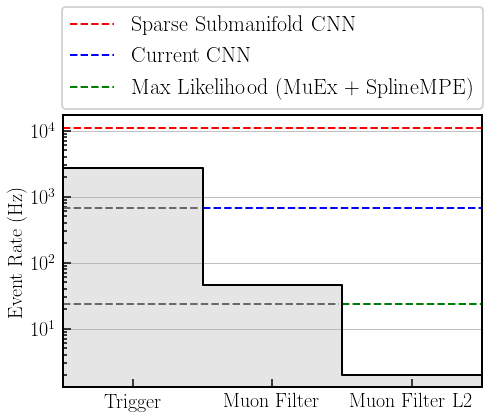

In [4]:
fig, ax = plt.subplots()

ax.axhline(y=sscnn, color='r', linestyle='--', label='Sparse Submanifold CNN')
ax.axhline(y=mirco_cnn, xmin=0., xmax=0.33, color='dimgray', linestyle='--')
ax.axhline(y=mirco_cnn, xmin=0.3334, xmax=1, color='b', linestyle='--', label='Current CNN')
ax.axhline(y=splineMPE, xmin=0., xmax=0.66, color='dimgray', linestyle='--')
ax.axhline(y=splineMPE, xmin=0.6667, xmax=1, color='g', linestyle='--', label='Max Likelihood (MuEx + SplineMPE)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.44), prop={'size': 22})
plt.ylabel('Event Rate (Hz)')

ax.step([0, 1, 2, 3], [ic_gen1_trigger, ic_gen1_trigger, ic_gen1_muon_filter, ic_gen1_muon_l2], where='pre', color='k')
xtick_labels = ['Trigger', 'Muon Filter', 'Muon Filter L2']
ax.set_xticks(range(len(xtick_labels)))
ax.set_xticklabels(xtick_labels)

ax.xaxis.set(ticks=np.arange(0.5, len(xtick_labels)), ticklabels=xtick_labels)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.fill_between([0,1,2,3], [0,0,0,0], [ic_gen1_trigger, ic_gen1_trigger, ic_gen1_muon_filter, ic_gen1_muon_l2], step='pre', alpha=0.1, color='k')

ax.grid(axis='y')
plt.yscale('log')
ax.margins(x=0)
plt.savefig('./event_rates.png')

In [8]:
# energy results, quality dataset
trad_cnn_e_preds_t = np.load('../data/cnn11_trigger_scaled_E_fix_1_preds_E.npy')
trad_cnn_e_truth_t = np.load('../data/cnn11_trigger_scaled_E_fix_1_truth_E.npy')
sscnn_e_preds = np.load('../data/sscnn_e_preds2.npy')
sscnn_e_truth = np.load('../data/sscnn_e_truth2.npy')
sscnn_res = np.load('../data/sscnn_quality_scaled_E_fix_24_res.npy', allow_pickle=True).item()
trad_cnn_res = np.load('../data/cnn11_quality_scaled_E_fix_1_res.npy', allow_pickle=True).item()

# trigger dataset
# trad_cnn_e_preds_t = np.load('./data/trad_cnn_e_preds_t.npy')

sscnn_e_preds_t = np.load('../data/sscnn_trigger_scaled_E_fix_24_preds_E.npy')
sscnn_e_truth_t = np.load('../data/sscnn_trigger_scaled_E_fix_24_truth_E.npy')
sscnn_res_t = np.load('../data/sscnn_trigger_scaled_E_fix_24_res.npy', allow_pickle=True).item()
trad_cnn_res_t = np.load('../data/cnn11_trigger_scaled_E_fix_1_res.npy', allow_pickle=True).item()

bins = np.logspace(2, 6, 20, endpoint=False)

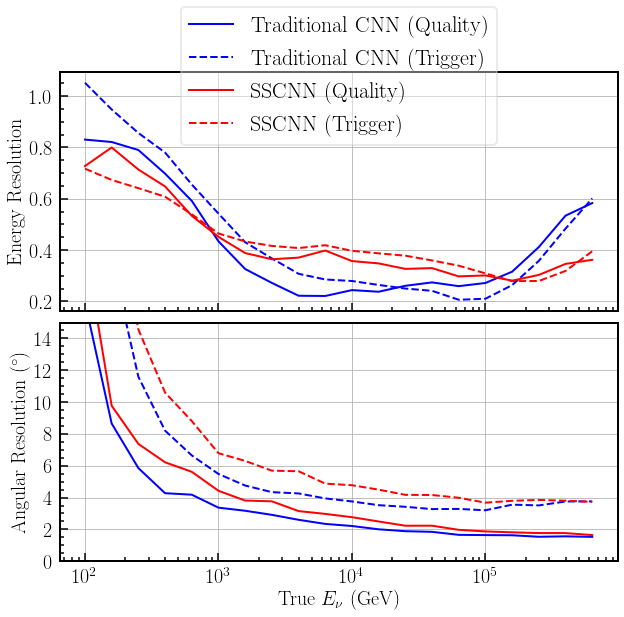

In [10]:
fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10, 9))
ax1.plot(bins, trad_cnn_res['m_diff'], color='b', label='Traditional CNN (Quality)')
ax1.plot(bins, trad_cnn_res_t['m_diff'], color='b', linestyle='--', label='Traditional CNN (Trigger)')
ax1.plot(bins, sscnn_res['m_diff'], color='r', label='SSCNN (Quality)')
ax1.plot(bins, sscnn_res_t['m_diff'], color='r', linestyle='--', label='SSCNN (Trigger)')
ax1.grid()

ax2.plot(bins, trad_cnn_res['m_ad']*(180/np.pi), color='b', label='Traditional CNN (Quality)')
ax2.plot(bins, trad_cnn_res_t['m_ad']*(180/np.pi), color='b', linestyle='--', label='Traditional CNN (Trigger)')
ax2.plot(bins, sscnn_res['m_ad']*(180/np.pi), color='r', label='SSCNN (Quality)')
ax2.plot(bins, sscnn_res_t['m_ad']*(180/np.pi), color='r', linestyle='--', label='SSCNN (Trigger)')
ax2.set_ylim([0, 15])
ax2.set_yticks(np.arange(0, 15, step=2))
ax2.grid()

plt.xscale('log')
plt.xlabel(r'True $E_{\nu}$ (GeV)')
ax1.set_ylabel('Energy Resolution')
ax2.set_ylabel('Angular Resolution ($^\circ$)')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.32), prop={'size': 22}, framealpha=0.4)
plt.subplots_adjust(hspace=.05)
plt.savefig('./results.png')

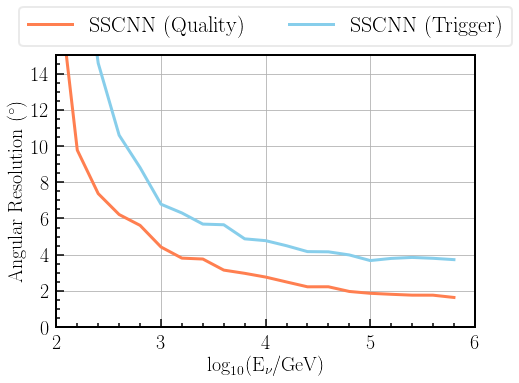

In [11]:
# plt.figure(figsize=(10,6))
# plt.plot(bins, trad_cnn_res['m_ad']*(180/np.pi), color='b', label='Traditional CNN (Quality)')
# plt.plot(bins, trad_cnn_res_t['m_ad']*(180/np.pi), color='b', linestyle='--', label='Traditional CNN (Trigger)')
plt.plot(np.log10(bins), sscnn_res['m_ad']*(180/np.pi), linewidth=3, color='coral', label='SSCNN (Quality)')
#plt.plot(bins, sscnn_res['p20_ad']*(180/np.pi), color='coral', linestyle='--', label='SSCNN (Quality)')
#plt.plot(bins, sscnn_res['p80_ad']*(180/np.pi), color='coral', linestyle='--', label='SSCNN (Quality)')
#plt.fill_between(bins,sscnn_res['p20_ad']*(180/np.pi),sscnn_res['p80_ad']*(180/np.pi),color='coral',alpha=0.4)
plt.plot(np.log10(bins), sscnn_res_t['m_ad']*(180/np.pi), linewidth=3, color='skyblue', label='SSCNN (Trigger)')
# plt.plot(bins, linefit_ad, color='k', linestyle='--', label='Linefit (Trigger)')
plt.ylim([0, 15])
plt.xlim([2, 6])
plt.xticks(np.arange(2, 7, step=1))
plt.yticks(np.arange(0, 15, step=2))
plt.grid()

# plt.xscale('log')
plt.xlabel(r'$\log_{10}$(E$_{\nu}$/GeV)')
plt.ylabel('Angular Resolution ($^\circ$)')
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.22), prop={'size': 22}, framealpha=0.4)
plt.subplots_adjust(hspace=.05)
plt.savefig('./angular_results.png')

In [12]:
def quantiles(logtE,logrE,wgt) :

    xbins = np.linspace(1.5,6.5,31)

    x   = []
    y50 = []
    y05 = []
    y95 = []
    for i in range(len(xbins)-1) :
        lw = logtE>xbins[i]       
        up = logtE<xbins[i+1]
        fc = lw & up
        print(xbins[i],xbins[i+1],np.sum(fc))
        if np.sum(fc)==0 : continue
        values = logrE[fc]
        sample_weight = wgt[fc]
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]
        weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
        weighted_quantiles /= np.sum(sample_weight)
        x.append(xbins[i]+(xbins[i+1]-xbins[i])/2)
        y50.append(np.interp(0.50,weighted_quantiles, values))
        y05.append(np.interp(0.05,weighted_quantiles, values))
        y95.append(np.interp(0.95,weighted_quantiles, values))
        # y05.append(np.interp(0.18,weighted_quantiles, values))
        # y95.append(np.interp(0.82,weighted_quantiles, values))
    
    return x,y50,y05,y95

In [13]:
starting_mask = np.load('../data/starting_events.npy')
starting = np.where(starting_mask)[0]
tg = np.where(~starting_mask)[0]
starting_qs = quantiles(sscnn_e_truth_t[starting], sscnn_e_preds_t[starting], np.ones(sscnn_e_preds_t[starting].shape))
tg_qs = quantiles(sscnn_e_truth_t[tg], sscnn_e_preds_t[tg], np.ones(sscnn_e_preds_t[tg].shape))

trad_starting_qs = quantiles(trad_cnn_e_truth_t[starting], trad_cnn_e_preds_t[starting], np.ones(trad_cnn_e_preds_t[starting].shape))
trad_tg_qs = quantiles(trad_cnn_e_truth_t[tg], trad_cnn_e_preds_t[tg], np.ones(trad_cnn_e_preds_t[tg].shape))

1.5 1.6666666666666667 0
1.6666666666666667 1.8333333333333333 0
1.8333333333333333 2.0 0
2.0 2.1666666666666665 267
2.1666666666666665 2.333333333333333 328
2.333333333333333 2.5 356
2.5 2.6666666666666665 378
2.6666666666666665 2.833333333333333 391
2.833333333333333 3.0 390
3.0 3.1666666666666665 369
3.1666666666666665 3.333333333333333 348
3.333333333333333 3.5 332
3.5 3.6666666666666665 358
3.6666666666666665 3.833333333333333 325
3.833333333333333 4.0 323
4.0 4.166666666666666 334
4.166666666666666 4.333333333333333 331
4.333333333333333 4.5 362
4.5 4.666666666666666 355
4.666666666666666 4.833333333333333 320
4.833333333333333 5.0 331
5.0 5.166666666666666 319
5.166666666666666 5.333333333333333 359
5.333333333333333 5.5 363
5.5 5.666666666666666 309
5.666666666666666 5.833333333333333 346
5.833333333333333 6.0 313
6.0 6.166666666666666 0
6.166666666666666 6.333333333333333 0
6.333333333333333 6.5 0
1.5 1.6666666666666667 0
1.6666666666666667 1.8333333333333333 0
1.8333333333333

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


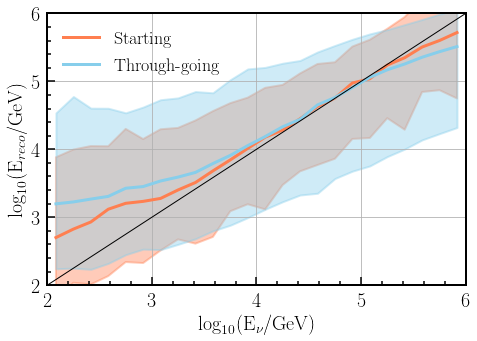

In [14]:
plt.plot(starting_qs[0],starting_qs[1],linewidth=3,color='coral',linestyle='-',label='Starting')
plt.fill_between(starting_qs[0],starting_qs[3],starting_qs[2],color='coral',alpha=0.4)
plt.plot(tg_qs[0],tg_qs[1],linewidth=3,color='skyblue',linestyle='-',label='Through-going')
plt.fill_between(tg_qs[0],tg_qs[3],tg_qs[2],color='skyblue',alpha=0.4)
# plt.plot(tg_qs[0], tg_qs[1])
plt.ylim(2,6)
plt.xlim(2,6)
plt.plot([0,10],[0,10],linewidth=1,color='black',linestyle='-')
plt.grid()
plt.xlabel(r'$\log_{10}$(E$_{\nu}$/GeV)')
plt.ylabel(r'$\log_{10}$(E$_{reco}$/GeV)')
plt.legend(loc='upper left', prop={'size': 18}, frameon=False)
plt.savefig('./energy_res_starting_tg.png')